In [2]:
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
from keras.models import load_model
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


Preparation and preprocessing of data which will be fed to auto-encoder for image compression later

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

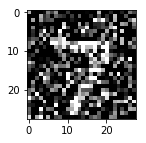

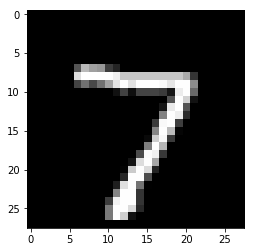

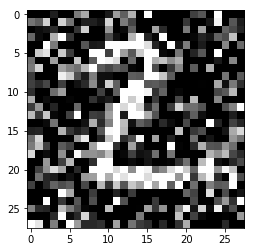

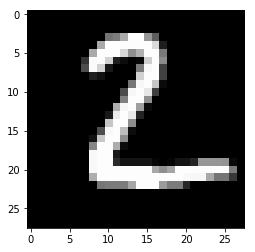

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(2):
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    plt.show()
    plt.imshow(x_test[i].reshape(28, 28))        
    plt.gray()
    plt.show()

In [14]:
print(x_test_noisy.shape, x_test_noisy.shape)

(10000, 784) (10000, 784)


In [15]:
model = Sequential()

model.add(Dense(784, input_dim = 784))
model.add(Dense(32, activation='relu',input_dim = 784))
model.add(Dense(32, activation='relu',input_dim = 32))
model.add(Dense(784,activation='sigmoid', input_dim = 32))

model.layers.pop()

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 667,488
Trainable params: 667,488
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [17]:
model.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.3155 - val_loss: 0.2921
Epoch 2/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.2602 - val_loss: 0.2979
Epoch 3/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.2433 - val_loss: 0.2864
Epoch 4/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.2295 - val_loss: 0.2877
Epoch 5/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2174 - val_loss: 0.2859
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.2063 - val_loss: 0.2788
Epoch 7/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1962 - val_loss: 0.2712
Epoch 8/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1900 - val_loss: 0.2679
Epoch 9/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.1861 - val_loss: 0.2600
Epoch

In [18]:
model.save('my_model_denoising.h5')

In [19]:
model = load_model('my_model_denoising.h5')

In [25]:
get_encoded_layer_output = K.function([model.layers[0].input],[model.layers[1].output])
encoder = get_encoded_layer_output([x_test_noisy])[0]
encoder.shape

(10000, 32)

In [26]:
get_decoder_layer_output = K.function([model.layers[2].input],[model.layers[3].output])
decoder = get_decoder_layer_output([encoder])[0]

In [27]:
decoder.shape

(10000, 784)

In [28]:
encoded_imgs = encoder
decoded_imgs = decoder

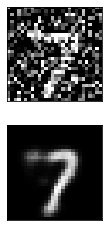

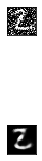

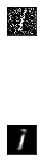

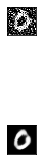

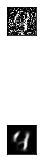

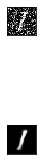

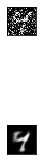

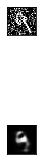

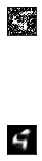

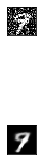

In [30]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()